In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
#read data using pandas
car_dataset = pd.read_csv("car data.csv")

In [3]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,NaN,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013.0,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017.0,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011.0,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014.0,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car_dataset.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016.0,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015.0,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009.0,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017.0,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016.0,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [5]:
#check num of rows and columns
car_dataset.shape

(301, 9)

In [6]:
#get info about dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       293 non-null    object 
 1   Year           288 non-null    float64
 2   Selling_Price  301 non-null    float64
 3   Present_Price  295 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 21.3+ KB


In [7]:
#check missing values
car_dataset.isnull().sum()

Car_Name          8
Year             13
Selling_Price     0
Present_Price     6
Kms_Driven        0
Fuel_Type         0
Seller_Type       0
Transmission      0
Owner             0
dtype: int64

In [8]:
# Display the number of missing values in each column
print("Number of missing values in each column:")
print(car_dataset.isnull().sum())

# Impute missing values with the most frequent value (mode) in place
car_dataset.fillna(car_dataset.mode().iloc[0], inplace=True)

# Display the DataFrame after imputing missing values with mode
print("\nDataFrame after imputing missing values with mode:")
print(car_dataset)


Number of missing values in each column:
Car_Name          8
Year             13
Selling_Price     0
Present_Price     6
Kms_Driven        0
Fuel_Type         0
Seller_Type       0
Transmission      0
Owner             0
dtype: int64

DataFrame after imputing missing values with mode:
    Car_Name    Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2015.0           3.35           5.59       27000    Petrol   
1        sx4  2013.0           4.75           9.54       43000    Diesel   
2       ciaz  2017.0           7.25           9.85        6900    Petrol   
3    wagon r  2011.0           2.85           4.15        5200    Petrol   
4      swift  2014.0           4.60           6.87       42450    Diesel   
..       ...     ...            ...            ...         ...       ...   
296     city  2016.0           9.50          11.60       33988    Diesel   
297     brio  2015.0           4.00           5.90       60000    Petrol   
298     city  2009.0          

In [9]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [10]:
# Convert 'Year' column to integer in place
car_dataset['Year'] = car_dataset['Year'].astype(int)

# Display the DataFrame after converting 'Year' to integer
print(car_dataset)




    Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2015           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1        Dealer       Manual      0

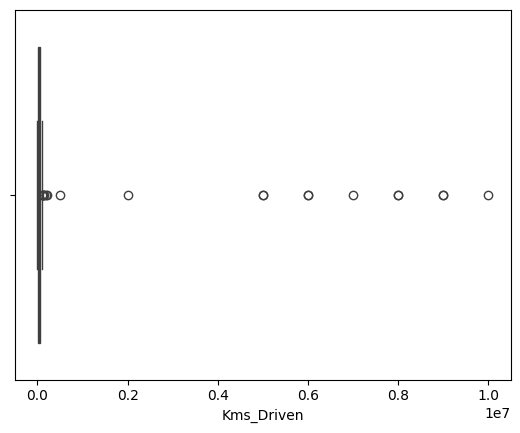

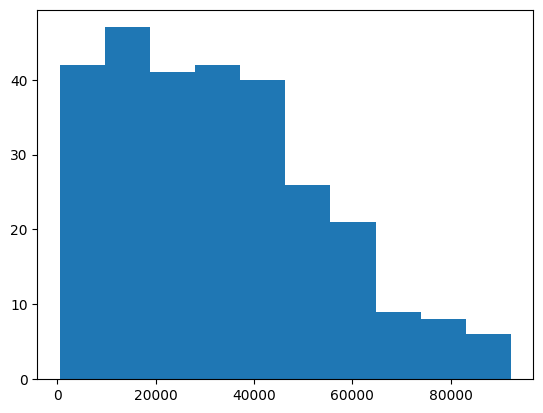

In [11]:
# Display the box plot using sns 
sns.boxplot(x=car_dataset['Kms_Driven'])
plt.show()

# Calculate the IQR "Interquartile range"
Q1 = car_dataset['Kms_Driven'].quantile(0.25)
Q3 = car_dataset['Kms_Driven'].quantile(0.75)
IQR = Q3 - Q1

# lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# filter to remove outliers
filtered_car_dataset = car_dataset[(car_dataset['Kms_Driven'] >= lower_bound) & (car_dataset['Kms_Driven'] <= upper_bound)]

# Display the histogram after removing outliers
plt.hist(filtered_car_dataset['Kms_Driven'], bins='auto')
plt.show()

In [12]:
#check distribution of categorical variables
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())


Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [13]:
#encode the categorical

#label encoding

car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)
#One Hot encoding

# import pandas as pd

# # Assuming you have a DataFrame called 'car_dataset' after label encoding

# # Perform one-hot encoding on the specified categorical columns
# car_dataset_encoded = pd.get_dummies(car_dataset, columns=['Fuel_Type', 'Seller_Type', 'Transmission'])

# # Extract the values as a NumPy array
# car_values_encoded = car_dataset_encoded.values



In [14]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2015,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [15]:
#split

X=car_dataset.drop(['Car_Name', 'Selling_Price'], axis=1)

Y= car_dataset['Selling_Price']

In [16]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2015           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [17]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [18]:
X_train, X_test, Y_train,Y_test = train_test_split(X,Y , test_size=0.2,random_state=2)

In [19]:
#Model Training
#load linear regression
lin_reg_model = LinearRegression()

In [20]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [21]:
#Evaluation

training_data_prediction = lin_reg_model.predict(X_train)

In [22]:
#R sqaure error

error_score= metrics.r2_score(Y_train , training_data_prediction)
print("R squared error:", error_score)


R squared error: 0.8716011356005614


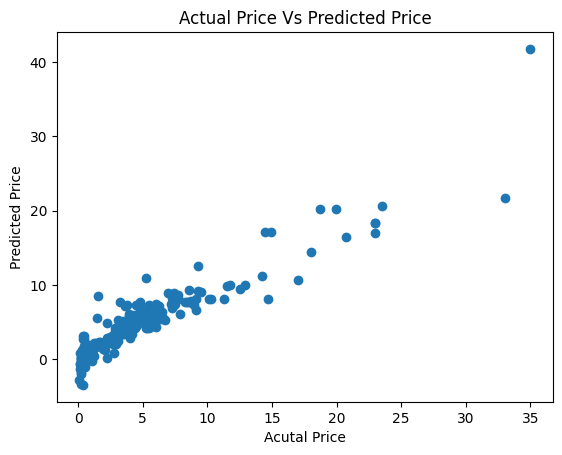

In [23]:
#visualize 
plt.scatter(Y_train, training_data_prediction)
plt.xlabel ("Acutal Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price Vs Predicted Price")
plt.show()

In [24]:
#prediction on training data like Y_predict in slides
test_data_prediction = lin_reg_model.predict(X_test)


In [25]:
#R sqaure
error_score = metrics.r2_score (Y_test, test_data_prediction)
print ("R sqaured Error:", error_score)

R sqaured Error: 0.842427621068321


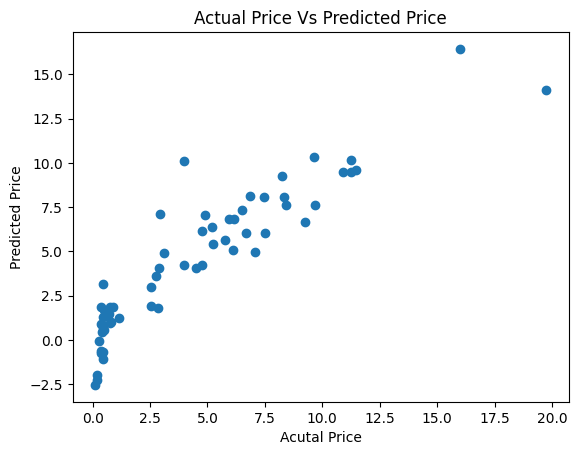

In [26]:

plt.scatter(Y_test, test_data_prediction)
plt.xlabel ("Acutal Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price Vs Predicted Price")
plt.show()

In [27]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [28]:
#evaluate using training data
mae = mean_absolute_error(Y_train,training_data_prediction)
rmse = np.sqrt(mean_squared_error(Y_train, training_data_prediction))
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 1.212406230309404
Root Mean Squared Error: 1.8816180088517709


In [29]:
# Evaluate the model using MAE and RMSE using test data
mae = mean_absolute_error(Y_test,test_data_prediction)
rmse = np.sqrt(mean_squared_error(Y_test, test_data_prediction))
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 1.2375041709075578
Root Mean Squared Error: 1.7011910463186852


In [30]:
#prediction of output of new values 
import pandas as pd
#I created new data frame for new values 
new_values_df = pd.DataFrame([[2015, 8.0, 35000, 'Petrol', 'Dealer', 'Manual', 0]],
                              columns=['Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'])

# One-hot encode the categorical features
new_values_df_encoded = pd.get_dummies(new_values_df, columns=['Fuel_Type', 'Seller_Type', 'Transmission'])

# Extract the values as a NumPy array
new_values_encoded = new_values_df_encoded.values

# Use the trained model to predict the output for the new values
new_predictions = lin_reg_model.predict(new_values_encoded)
print("Predictions for new values:", new_predictions)



Predictions for new values: [5.74943416]


c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [31]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Create a new data frame for new values
new_values_df = pd.DataFrame([[2015, 8.0, 35000, 'Petrol', 'Dealer', 'Manual', 0]],
                              columns=['Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'])

# Initialize a LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the categorical features
new_values_df['Fuel_Type'] = label_encoder.fit_transform(new_values_df['Fuel_Type'])
new_values_df['Seller_Type'] = label_encoder.fit_transform(new_values_df['Seller_Type'])
new_values_df['Transmission'] = label_encoder.fit_transform(new_values_df['Transmission'])

# Extract the values as a NumPy array
new_values_encoded = new_values_df.values

# Use the trained model to predict the output for the new values
new_predictions = lin_reg_model.predict(new_values_encoded)
print("Predictions for new values:", new_predictions)


Predictions for new values: [5.18015943]


c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


R squared error: 0.8343015467459769


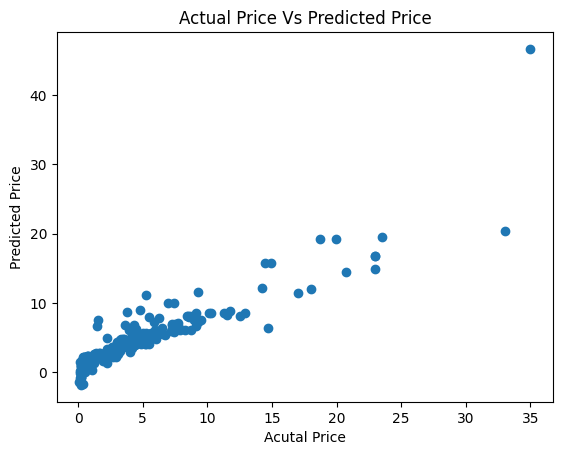

R sqaured Error: 0.856977680941567


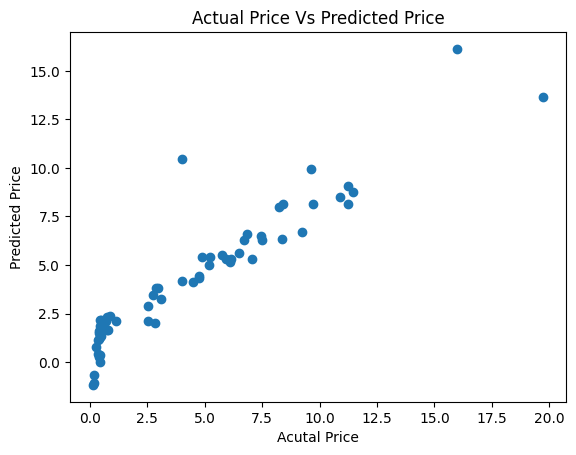

Mean Absolute Error: 1.3029761524049561
Root Mean Squared Error: 2.137519556668738
Mean Absolute Error: 1.1155183056263969
Root Mean Squared Error: 1.6207459693970179


In [36]:
#Model Training
#load lasso regression
lass_reg_model = Lasso()
lass_reg_model.fit(X_train,Y_train)
#Evaluation

training_data_prediction = lass_reg_model.predict(X_train)
#R sqaure error

error_score= metrics.r2_score(Y_train , training_data_prediction)
print("R squared error:", error_score)

#visualize 
plt.scatter(Y_train, training_data_prediction)
plt.xlabel ("Acutal Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price Vs Predicted Price")
plt.show()

#prediction on training data like Y_predict in slides
test_data_prediction = lass_reg_model.predict(X_test)

#R sqaure
error_score = metrics.r2_score (Y_test, test_data_prediction)
print ("R sqaured Error:", error_score)
plt.scatter(Y_test, test_data_prediction)
plt.xlabel ("Acutal Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price Vs Predicted Price")
plt.show()

#evaluate using training data
mae = mean_absolute_error(Y_train,training_data_prediction)
rmse = np.sqrt(mean_squared_error(Y_train, training_data_prediction))
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")


# Evaluate the model using MAE and RMSE using test data
mae = mean_absolute_error(Y_test,test_data_prediction)
rmse = np.sqrt(mean_squared_error(Y_test, test_data_prediction))
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")




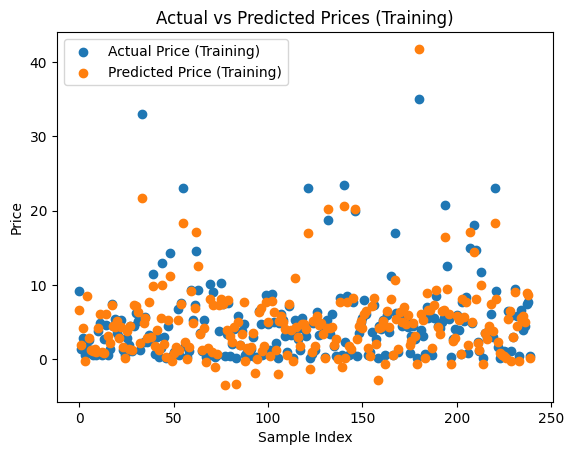

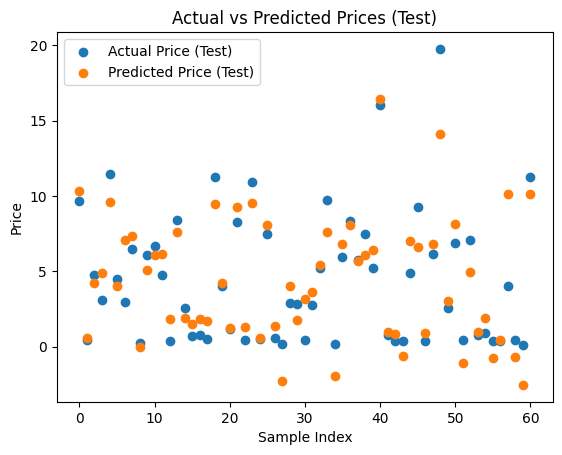

R squared error: 0.9789818632724074


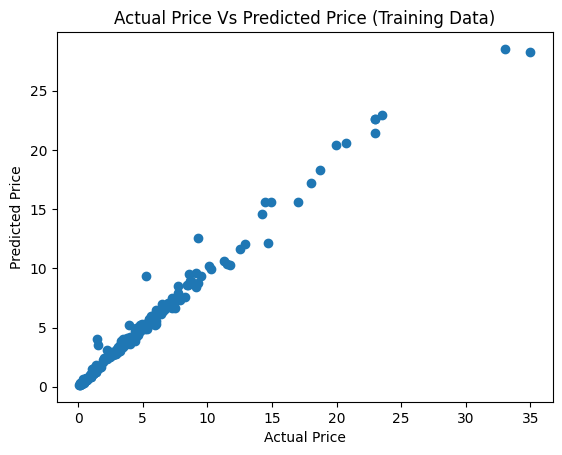

R squared Error: 0.9293665370810626


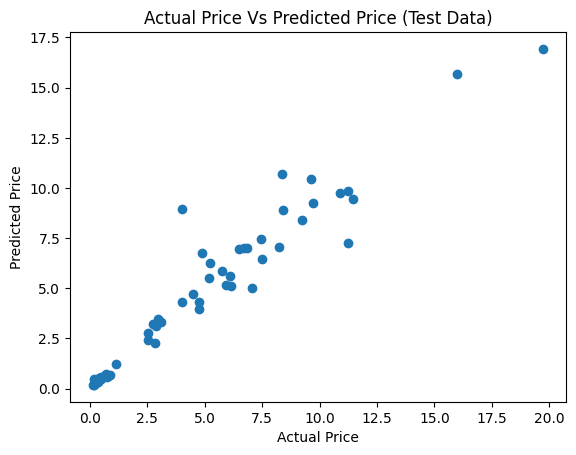

Mean Absolute Error (Training): 0.3205586111111109
Root Mean Squared Error (Training): 0.7612862329514972
Mean Absolute Error (Test): 0.630299453551913
Root Mean Squared Error (Test): 1.1389857530641292


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have X and Y defined before this point

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Model Training
# Load Random Forest Regression
rf_model = RandomForestRegressor(random_state=2)
rf_model.fit(X_train, Y_train)

# Visualize the scaling problem
plt.scatter(range(len(Y_train)), Y_train, label='Actual Price (Training)')
plt.scatter(range(len(training_data_prediction)), training_data_prediction, label='Predicted Price (Training)')
plt.xlabel("Sample Index")
plt.ylabel("Price")
plt.legend()
plt.title("Actual vs Predicted Prices (Training)")
plt.show()

plt.scatter(range(len(Y_test)), Y_test, label='Actual Price (Test)')
plt.scatter(range(len(test_data_prediction)), test_data_prediction, label='Predicted Price (Test)')
plt.xlabel("Sample Index")
plt.ylabel("Price")
plt.legend()
plt.title("Actual vs Predicted Prices (Test)")
plt.show()


# Apply Min-Max Scaling to treat outliers
min_max_scaler = MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)

# Apply Robust Scaling to treat outliers
robust_scaler = RobustScaler()
X_train_robust_scaled = robust_scaler.fit_transform(X_train)
X_test_robust_scaled = robust_scaler.transform(X_test)

# Now you can use X_train_scaled, X_test_scaled, X_train_robust_scaled, X_test_robust_scaled in your model training

# Model Training with Min-Max Scaling
rf_model_minmax = RandomForestRegressor(random_state=2)
rf_model_minmax.fit(X_train_scaled, Y_train)

# Model Training with Robust Scaling
rf_model_robust = RandomForestRegressor(random_state=2)
rf_model_robust.fit(X_train_robust_scaled, Y_train)



# Evaluation on Training Data
training_data_prediction = rf_model.predict(X_train)

# R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error:", error_score)

# Visualize
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price Vs Predicted Price (Training Data)")
plt.show()

# Prediction on Test Data
test_data_prediction = rf_model.predict(X_test)

# R squared error on Test Data
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error:", error_score)

# Visualize
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price Vs Predicted Price (Test Data)")
plt.show()

# Evaluate using training data
mae = mean_absolute_error(Y_train, training_data_prediction)
rmse = np.sqrt(mean_squared_error(Y_train, training_data_prediction))
print(f"Mean Absolute Error (Training): {mae}")
print(f"Root Mean Squared Error (Training): {rmse}")

# Evaluate using test data
mae = mean_absolute_error(Y_test, test_data_prediction)
rmse = np.sqrt(mean_squared_error(Y_test, test_data_prediction))
print(f"Mean Absolute Error (Test): {mae}")
print(f"Root Mean Squared Error (Test): {rmse}")


In [33]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import MinMaxScaler, RobustScaler
# from sklearn.ensemble import RandomForestRegressor
# from sklearn import metrics
# import matplotlib.pyplot as plt
# import numpy as np

# def visualize_scaling_problem(Y, predictions, dataset_type):
#     plt.scatter(range(len(Y)), Y, label=f'Actual Price ({dataset_type})')
#     plt.scatter(range(len(predictions)), predictions, label=f'Predicted Price ({dataset_type})')
#     plt.xlabel("Sample Index")
#     plt.ylabel("Price")
#     plt.legend()
#     plt.title(f'Actual vs Predicted Prices ({dataset_type})')
#     plt.show()

# def evaluate_model(model, X, Y, dataset_type):
#     predictions = model.predict(X)

#     # R squared error
#     error_score = metrics.r2_score(Y, predictions)
#     print(f'R squared error ({dataset_type}): {error_score}')

#     # Visualize
#     plt.scatter(Y, predictions)
#     plt.xlabel("Actual Price")
#     plt.ylabel("Predicted Price")
#     plt.title(f'Actual Price Vs Predicted Price ({dataset_type})')
#     plt.show()

#     # Evaluate using data
#     mae = mean_absolute_error(Y, predictions)
#     rmse = np.sqrt(mean_squared_error(Y, predictions))
#     print(f"Mean Absolute Error ({dataset_type}): {mae}")
#     print(f"Root Mean Squared Error ({dataset_type}): {rmse}")

# def train_and_evaluate_with_scaling(X_train, Y_train, X_test, Y_test, scaler, scaler_name):
#     # Apply scaling to treat outliers
#     X_train_scaled = scaler.fit_transform(X_train)
#     X_test_scaled = scaler.transform(X_test)

#     # Model Training
#     model = RandomForestRegressor(random_state=2)
#     model.fit(X_train_scaled, Y_train)

#     # Visualize the scaling problem
#     visualize_scaling_problem(Y_train, model.predict(X_train_scaled), 'Training')
#     visualize_scaling_problem(Y_test, model.predict(X_test_scaled), 'Test')

#     # Evaluate on Training Data
#     evaluate_model(model, X_train_scaled, Y_train, 'Training')

#     # Evaluate on Test Data
#     evaluate_model(model, X_test_scaled, Y_test, 'Test')

#     print(f"Model trained and evaluated using {scaler_name} scaling")

# # Split the data into training and testing sets
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# # Train and evaluate with Min-Max Scaling
# train_and_evaluate_with_scaling(X_train, Y_train, X_test, Y_test, MinMaxScaler(), 'Min-Max')

# # Train and evaluate with Robust Scaling
# train_and_evaluate_with_scaling(X_train, Y_train, X_test, Y_test, RobustScaler(), 'Robust')
